# **1. 데이터 전처리**
- - -

In [507]:
import pandas as pd

# 데이터 호출
df = pd.read_csv(r'vgames2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [508]:
# 중복데이터 제거

df.drop_duplicates(inplace=True)
df.shape

(16597, 9)

### **1-1. 매출 데이터**

In [509]:
# 매출 columns 문자 정리-1 (K,M 삭제)

# New Super Mario Bros의 매출표에 근거하여 기존 단위는 M으로 설정
# https://www.siliconera.com/wp-content/uploads/2010/05/nsmb_wii_sales.jpg?resize=515%2C387

df_list = []
for i in range(df.loc[:,'NA_Sales':'Other_Sales'].shape[1]):
  j = i+5
  # K,M 포함 행 추출
  df_k = df[df.iloc[:,j].str.contains('K') == True].copy()
  df_m = df[df.iloc[:,j].str.contains('M') == True].copy()

  # K포함 행은 K삭제 후 1000나누기, M포함 행은 M삭제만 진행
  df_k.iloc[:,j] = df_k.iloc[:,j].str.extract('(\d+)').astype(float)/1000
  df_m.iloc[:,j] = df_m.iloc[:,j].str.extract('(\d+)').astype(float)

  # 정리한 행 합치기
  df_c = pd.concat([df_k, df_m])
  df_list.append(df_c.iloc[:,j])
  
df_num = pd.concat(df_list, axis=1)
df_num

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,0.48,0.0,0.0,NaN
36,NaN,0.0,NaN,NaN
45,0.06,NaN,NaN,NaN
64,NaN,NaN,NaN,0.00
73,NaN,NaN,NaN,0.00
...,...,...,...,...
16525,NaN,0.0,NaN,NaN
16571,NaN,0.0,NaN,NaN
16578,0.32,NaN,NaN,NaN
16580,NaN,NaN,0.0,NaN


In [510]:
# 매출 columns 문자 정리-2 (데이터 덮어쓰기)

df.update(df_num, overwrite=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [511]:
# 매출 columns 문자 정리-3 (데이터 float으로 변경)

df.iloc[:,5:9] = df.iloc[:,5:9].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [512]:
# 결측치 확인

df.isna().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

### **1-2. 연도 데이터**

In [516]:
# 연도 이상치 수정-1

# 30미만은 19oo, 30이상 100미만은 20oo
df_year_30 = df.query('Year < 30').copy()
df_year_100 = df.query('(Year >= 30) & (Year < 100)').copy()
df_year_30['Year'] = df_year_30['Year'] + 2000
df_year_100['Year'] = df_year_100['Year'] + 1900
df_year_00 = pd.concat([df_year_30, df_year_100], axis=0)
df_year_00

# 데이터 업데이트
df.update(df_year_00, overwrite=True)
df_year = df.sort_values('Year').reset_index(drop=True)
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00
1,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
2,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
3,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0.0,0.01
4,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
...,...,...,...,...,...,...,...,...,...
16592,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00
16593,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03
16594,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.0,0.05
16595,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.0,0.00


In [517]:
# 연도 이상치 수정-2.

df.loc[6906, 'Year'] = 2009.0
df.loc[10107, 'Year'] = 2016.0
df.loc[15233, 'Year'] = 2016.0
df.loc[5310, 'Year'] = 2016.0
df[df['Name'].str.contains('Imagine: Makeup Artist')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2009.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02


In [518]:
# 그룹별 연도 결측치 기입

# 그룹의 평균 연도로 결측치 수정
fill_func = lambda g: g.fillna(g.mean())
df_year_num = df.iloc[:,:3].groupby('Name').apply(fill_func)

# 인덱스 초기화(이름순서 정렬)
df_year_num.reset_index(drop=True, inplace=True)
df_year_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Name,Platform,Year
0,'98 Koshien,PS,1998.0
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0
...,...,...,...
16592,uDraw Studio,Wii,2010.0
16593,uDraw Studio: Instant Artist,X360,2011.0
16594,uDraw Studio: Instant Artist,Wii,2011.0
16595,wwe Smackdown vs. Raw 2006,PS2,NaN


In [519]:
# 이름순서 정렬

df = df.sort_values('Name').reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16592,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
16593,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
16594,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
16595,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41


In [520]:
# 데이터 업데이트

df.update(df_year_num, overwrite=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16592,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
16593,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
16594,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
16595,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41


In [521]:
# 결측치 중 평균 매출 이상 데이터의 결측 연도 직접 기입

# 연도 결측치 데이터 추출
df_year_na = df[df['Year'].isna()].loc[:,['Name', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index()
df_year_na = df_year_na.groupby(['index']).sum().sum(axis=1).sort_values(ascending=False)

# 평균이상 데이터의 결측연도 기입
df_year_me = pd.DataFrame(df_year_na[df_year_na > df_year_na.mean()])

df_year_me['Year'] = [2005, 2007, 2001, 2007, 2007, 1998, 1980, 1977, 2007, 1999, 1997, 2002, 1977, 2010, 2004, 2011, 2011,
                      2008, 2006, 1980, 1982, 1980, 2008, 2008, 1978, 1978, 2010, 2011, 2002, 2001, 2008, 2002, 1978, 2006,
                      2004, 1980, 2004, 1979, 2000, 2008]
                      
df_year_me = df_year_me['Year'].astype(float)

df.update(df_year_me, overwrite=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16592,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
16593,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
16594,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
16595,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41


### **1-3. 장르 데이터**

In [922]:
# 장르 결측치 데이터

#df_gen_name = df.groupby('Name')['Genre'].agg(**{'Genre':lambda x:x.mode()}).reset_index()

# **2. 지역에 따라 선호하는 장르**
- - -

In [548]:
# 지역에 따라 선호하는 게임 장르

df_sales = df.loc[:,['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 지역의 장르별 매출 합계
df_sales = df_sales.groupby('Genre').sum()
df_sales_ind = df_sales.reset_index()
df_sales_ind.set_index('Genre')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,870.19,519.33,157.63,186.02
Adventure,105.17,64.00,51.93,16.61
Fighting,222.65,101.19,86.18,36.28
Misc,407.51,211.68,105.08,73.71
Platform,445.53,199.28,130.07,51.39
Puzzle,123.34,50.37,56.87,12.47
Racing,355.73,235.69,56.38,77.02
Role-Playing,319.15,183.00,343.00,56.07
Shooter,580.14,311.16,38.24,102.25


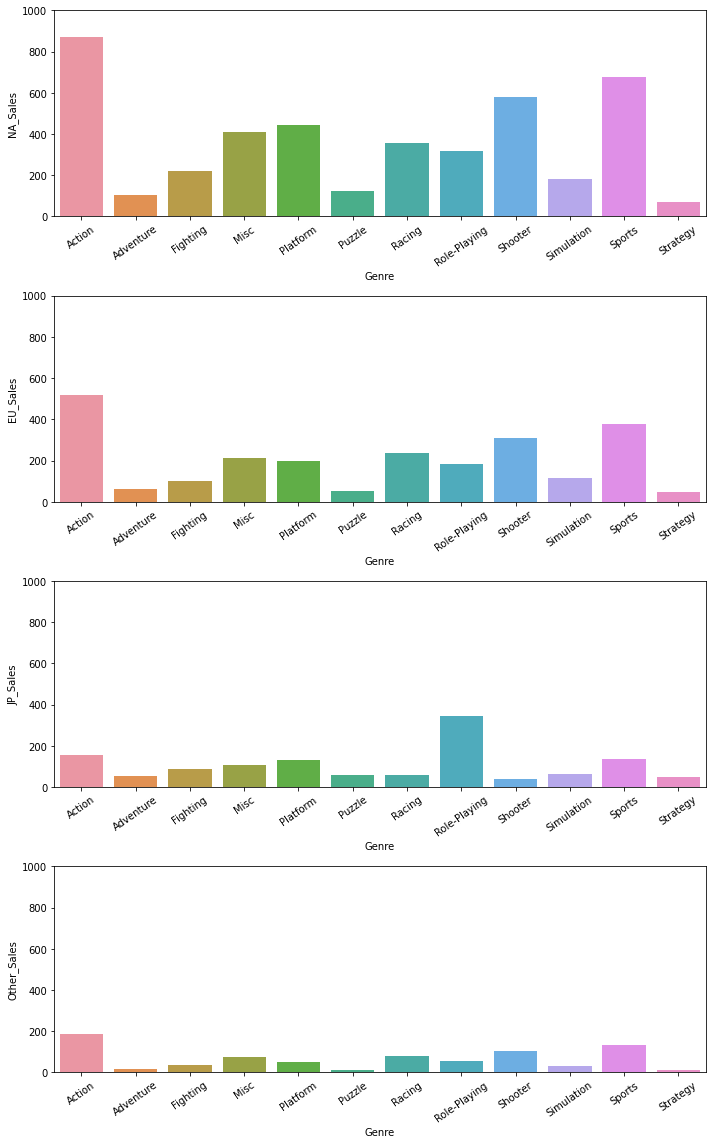

In [524]:
# 지역별 장르 매출 그래프

import seaborn as sns
import matplotlib.pyplot as plt

# 전체 그래프 크기 지정
fig = plt.figure()
fig.set_figheight(df_sales.shape[1]*4)
fig.set_figwidth(10)

# 4개지역 바그래프 
for i in range(df_sales.shape[1]):
  plt.subplot(df_sales.shape[1], 1, i+1)
  sns.barplot(x='Genre', y=df_sales_ind.iloc[:,i+1], data=df_sales_ind)
  plt.ylim(0, 1000);
  plt.xticks(rotation=35);

fig.tight_layout()

# **3. 연도별 선호하는 장르**
- - -

In [558]:
# 연도 결측치 제거, 정수형 변환

df_year_drop = df.dropna(subset=['Year']).copy()
df_year_drop['Year'] = df_year_drop['Year'].astype(int)
df_year_drop

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16592,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20
16593,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00
16594,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02
16595,wwe Smackdown vs. Raw 2006,PS2,2005,Fighting,NaN,1.57,1.02,0.00,0.41


In [559]:
# 연도별 장르 매출 정리

df_group = df_year_drop.groupby(['Genre', 'Year']).sum().sum(axis=1)
df_group = df_group.unstack()
df_group_ind = df_group.reset_index()


# 결측치 0으로
#df_group_ind.fillna(0, inplace=True)
df_group_ind.set_index('Genre')

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1.25,0.44,0.31,0.80,14.79,6.50,2.86,1.85,3.52,13.05,...,113.13,141.87,133.03,121.97,123.85,120.18,113.28,111.00,73.43,23.04
Adventure,NaN,NaN,NaN,1.30,NaN,NaN,0.40,NaN,NaN,NaN,...,19.45,29.53,21.12,16.37,15.76,4.70,7.08,6.81,7.73,2.18
Fighting,NaN,NaN,NaN,0.77,NaN,0.47,NaN,NaN,1.05,NaN,...,17.63,35.59,31.73,15.45,21.42,8.75,7.28,16.19,8.39,3.85
Misc,NaN,NaN,NaN,1.74,NaN,0.87,2.14,1.45,NaN,NaN,...,100.14,86.49,78.29,86.27,59.16,22.68,18.20,29.20,11.66,3.12
Platform,NaN,NaN,NaN,NaN,8.54,6.28,6.01,0.69,7.54,9.39,...,32.05,38.52,41.53,30.92,27.15,19.45,24.95,9.01,5.87,2.08
Puzzle,NaN,0.81,NaN,NaN,2.25,3.69,0.78,9.73,2.19,NaN,...,23.80,15.36,19.94,11.76,5.09,1.74,1.00,1.51,0.69,NaN
Racing,NaN,NaN,NaN,0.32,0.48,1.57,NaN,5.95,NaN,1.96,...,37.89,72.54,34.02,34.68,36.85,14.58,13.57,16.71,5.56,4.03
Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,...,43.05,61.00,44.68,70.32,54.18,47.51,36.55,50.72,37.23,6.90
Shooter,0.98,NaN,NaN,7.07,10.02,3.21,0.49,31.10,1.00,3.89,...,79.80,59.95,69.55,80.15,98.42,69.48,61.99,66.68,66.55,19.75


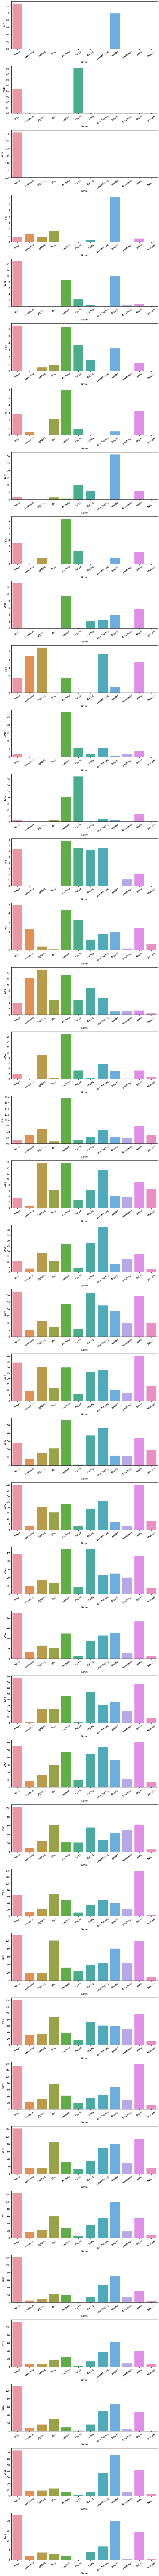

In [560]:
# 전체 그래프 크기 지정
fig = plt.figure()
fig.set_figheight(df_group.shape[1] * 4)
fig.set_figwidth(10)

# 연도별 장르 매출 추이
for i in range(df_group.shape[1]):
  plt.subplot(df_group.shape[1], 1, i+1)
  sns.barplot(x='Genre', y=df_group_ind.iloc[:,i+1], data=df_group_ind)
  #plt.xlim(0, 150);
  plt.xticks(rotation=35);

fig.tight_layout()

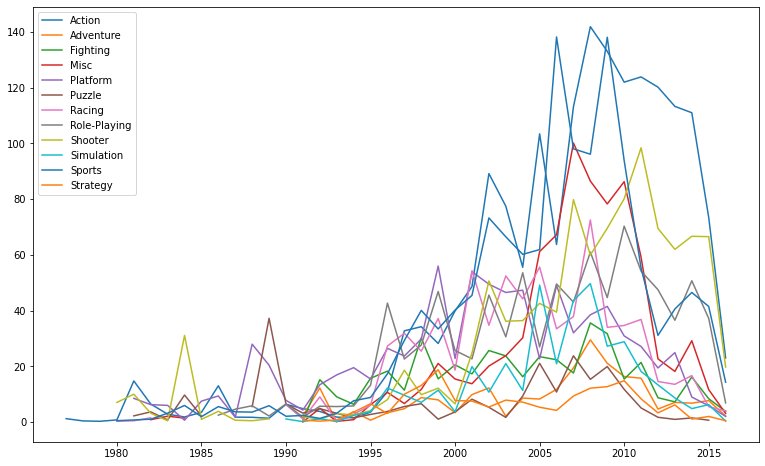

In [563]:
# 매출 그래프 합산 비교

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(13)

for i in range(df_group_ind.shape[0]):
  data = df_group_ind.iloc[i,1:]
  plt.plot(data, label=df_group_ind.iloc[i,0]);

plt.legend();

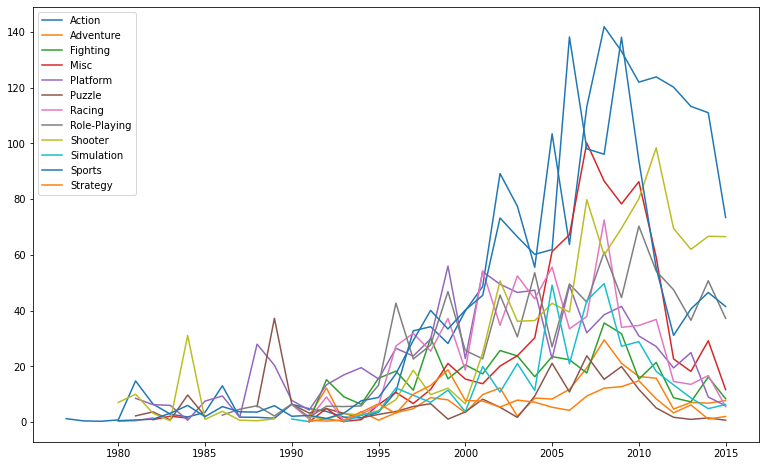

In [666]:
# 16년도 데이터가 부족하여 삭제 후 plot

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(13)

# 16년 데이터 삭제한 데이터 생성
df_group_ind15 = df_group_ind.iloc[:,:-1]

for i in range(df_group_ind15.shape[0]):
  data = df_group_ind15.iloc[i,1:]
  plt.plot(data, label=df_group_ind15.iloc[i,0]);

plt.legend();

In [667]:
# 미출력 소수점 제거

df_group_ind15.iloc[:,1:] = round(df_group_ind15.iloc[:,1:],2)
df_group_ind15

Year,Genre,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Action,1.25,0.44,0.31,0.80,14.79,6.50,2.86,1.85,3.52,...,63.72,113.13,141.87,133.03,121.97,123.85,120.18,113.28,111.00,73.43
1,Adventure,NaN,NaN,NaN,1.30,NaN,NaN,0.40,NaN,NaN,...,11.77,19.45,29.53,21.12,16.37,15.76,4.70,7.08,6.81,7.73
2,Fighting,NaN,NaN,NaN,0.77,NaN,0.47,NaN,NaN,1.05,...,22.39,17.63,35.59,31.73,15.45,21.42,8.75,7.28,16.19,8.39
3,Misc,NaN,NaN,NaN,1.74,NaN,0.87,2.14,1.45,NaN,...,67.22,100.14,86.49,78.29,86.27,59.16,22.68,18.20,29.20,11.66
4,Platform,NaN,NaN,NaN,NaN,8.54,6.28,6.01,0.69,7.54,...,49.01,32.05,38.52,41.53,30.92,27.15,19.45,24.95,9.01,5.87
5,Puzzle,NaN,0.81,NaN,NaN,2.25,3.69,0.78,9.73,2.19,...,10.81,23.80,15.36,19.94,11.76,5.09,1.74,1.00,1.51,0.69
6,Racing,NaN,NaN,NaN,0.32,0.48,1.57,NaN,5.95,NaN,...,33.48,37.89,72.54,34.02,34.68,36.85,14.58,13.57,16.71,5.56
7,Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.58,43.05,61.00,44.68,70.32,54.18,47.51,36.55,50.72,37.23
8,Shooter,0.98,NaN,NaN,7.07,10.02,3.21,0.49,31.10,1.00,...,39.48,79.80,59.95,69.55,80.15,98.42,69.48,61.99,66.68,66.55
9,Simulation,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,0.04,...,20.93,43.59,49.71,27.23,28.86,18.20,13.37,8.68,4.85,6.30


In [668]:
i = 1
df_rank = df_group_ind15[['Genre', df_group_ind15.columns[i]]].dropna().sort_values(df_group_ind15.columns[i], ascending=False)
df_rank

Year,Genre,1977
0,Action,1.25
8,Shooter,0.98


In [669]:
df_group_ind15

Year,Genre,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Action,1.25,0.44,0.31,0.80,14.79,6.50,2.86,1.85,3.52,...,63.72,113.13,141.87,133.03,121.97,123.85,120.18,113.28,111.00,73.43
1,Adventure,NaN,NaN,NaN,1.30,NaN,NaN,0.40,NaN,NaN,...,11.77,19.45,29.53,21.12,16.37,15.76,4.70,7.08,6.81,7.73
2,Fighting,NaN,NaN,NaN,0.77,NaN,0.47,NaN,NaN,1.05,...,22.39,17.63,35.59,31.73,15.45,21.42,8.75,7.28,16.19,8.39
3,Misc,NaN,NaN,NaN,1.74,NaN,0.87,2.14,1.45,NaN,...,67.22,100.14,86.49,78.29,86.27,59.16,22.68,18.20,29.20,11.66
4,Platform,NaN,NaN,NaN,NaN,8.54,6.28,6.01,0.69,7.54,...,49.01,32.05,38.52,41.53,30.92,27.15,19.45,24.95,9.01,5.87
5,Puzzle,NaN,0.81,NaN,NaN,2.25,3.69,0.78,9.73,2.19,...,10.81,23.80,15.36,19.94,11.76,5.09,1.74,1.00,1.51,0.69
6,Racing,NaN,NaN,NaN,0.32,0.48,1.57,NaN,5.95,NaN,...,33.48,37.89,72.54,34.02,34.68,36.85,14.58,13.57,16.71,5.56
7,Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.58,43.05,61.00,44.68,70.32,54.18,47.51,36.55,50.72,37.23
8,Shooter,0.98,NaN,NaN,7.07,10.02,3.21,0.49,31.10,1.00,...,39.48,79.80,59.95,69.55,80.15,98.42,69.48,61.99,66.68,66.55
9,Simulation,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,0.04,...,20.93,43.59,49.71,27.23,28.86,18.20,13.37,8.68,4.85,6.30


In [676]:
# 연도별 순위 메기기
rank_list = []
for i in range(df_group_ind15.shape[1]-1):
  j=i+1
  # 실존 데이터 등수별 출력
  df_rank_com = df_group_ind15[['Genre', df_group_ind15.columns[j]]].dropna().sort_values(df_group_ind15.columns[j], ascending=False).reset_index(drop=True)
  '''
  # 장르와 매출 묶은 column 생성
  cols = ['Genre', df_group_ind15.columns[i]]
  df_rank['Genre-Sales'] =df_rank[cols].apply(lambda gen: '-'.join(gen.values.astype(str)), axis=1)
  '''
  # 등수 데이터 담은 리스트 제작
  rank_list.append(df_rank_com)

df_rank = pd.concat(rank_list, axis=1)
df_rank

Year,Genre,1977,Genre,1978,Genre,1979,Genre,1980,Genre,1981,...,Genre,2011,Genre,2012,Genre,2013,Genre,2014,Genre,2015
0,Action,1.25,Puzzle,0.81,Action,0.31,Shooter,7.07,Action,14.79,...,Action,123.85,Action,120.18,Action,113.28,Action,111.00,Action,73.43
1,Shooter,0.98,Action,0.44,NaN,NaN,Misc,1.74,Shooter,10.02,...,Shooter,98.42,Shooter,69.48,Shooter,61.99,Shooter,66.68,Shooter,66.55
2,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,1.30,Platform,8.54,...,Misc,59.16,Role-Playing,47.51,Sports,40.61,Role-Playing,50.72,Sports,41.49
3,NaN,NaN,NaN,NaN,NaN,NaN,Action,0.80,Puzzle,2.25,...,Sports,55.26,Sports,31.13,Role-Playing,36.55,Sports,46.52,Role-Playing,37.23
4,NaN,NaN,NaN,NaN,NaN,NaN,Fighting,0.77,Sports,0.78,...,Role-Playing,54.18,Misc,22.68,Platform,24.95,Misc,29.20,Misc,11.66
5,NaN,NaN,NaN,NaN,NaN,NaN,Sports,0.52,Racing,0.48,...,Racing,36.85,Platform,19.45,Misc,18.20,Racing,16.71,Fighting,8.39
6,NaN,NaN,NaN,NaN,NaN,NaN,Racing,0.32,Simulation,0.44,...,Platform,27.15,Racing,14.58,Racing,13.57,Fighting,16.19,Adventure,7.73
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fighting,21.42,Simulation,13.37,Simulation,8.68,Platform,9.01,Simulation,6.30
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Simulation,18.20,Fighting,8.75,Fighting,7.28,Adventure,6.81,Platform,5.87
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Adventure,15.76,Adventure,4.70,Adventure,7.08,Simulation,4.85,Racing,5.56


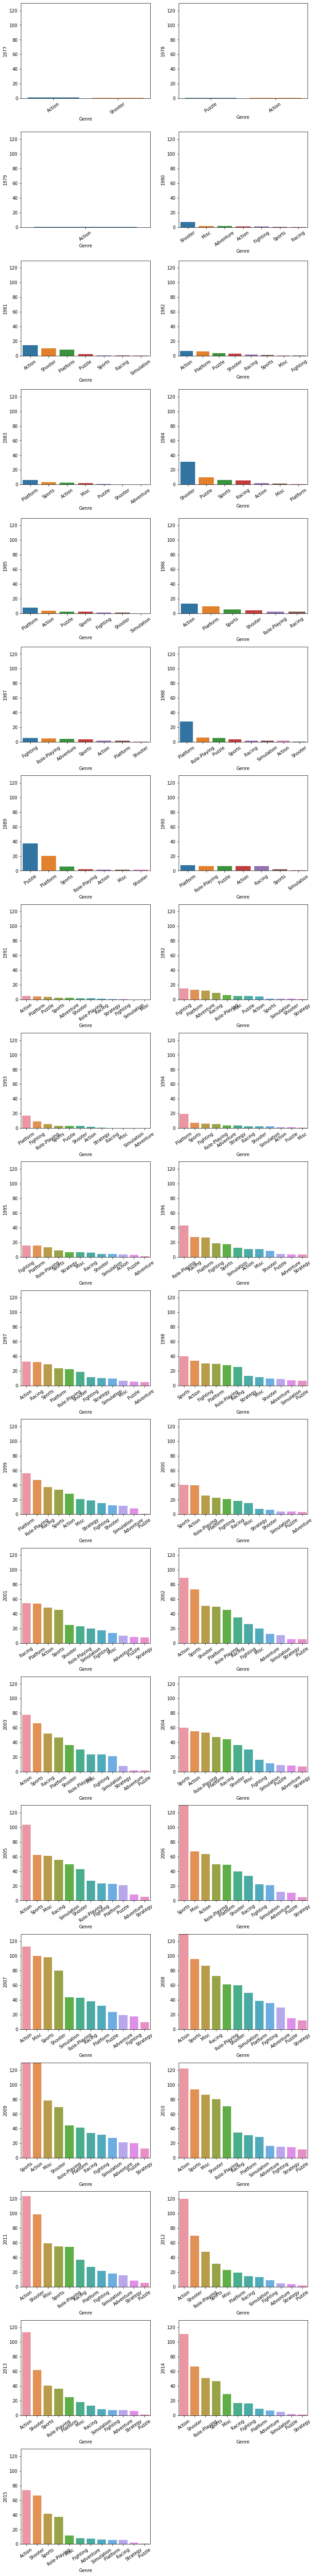

In [675]:
# 연도별 등수 바그래프

# 전체 그래프 크기 지정
fig = plt.figure()
fig.set_figheight((df_rank.shape[1]/2) * 4)
fig.set_figwidth(10)

# 연도별 인기 장르 추이
for i in range(int(df_rank.shape[1]/2)):
  plt.subplot(df_rank.shape[1]/2, 2, i+1)
  sns.barplot(x=df_rank.iloc[:,i*2], y=df_rank.iloc[:,(i*2)+1], data=df_rank)
  plt.ylim(0, 130);
  plt.xticks(rotation=35);

fig.tight_layout()

# **3. 장르별 매출 유사도**
- - -

In [810]:
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,870.19,519.33,157.63,186.02
Adventure,105.17,64.00,51.93,16.61
Fighting,222.65,101.19,86.18,36.28
Misc,407.51,211.68,105.08,73.71
Platform,445.53,199.28,130.07,51.39
Puzzle,123.34,50.37,56.87,12.47
Racing,355.73,235.69,56.38,77.02
Role-Playing,319.15,183.00,343.00,56.07
Shooter,580.14,311.16,38.24,102.25


In [811]:
# 장르 연도 pca

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()

# 데이터 표준화
Z = scaler.fit_transform(df_sales)

# pca 적용
B = pca.fit_transform(Z)
df_b = pd.DataFrame(B)
df_b.columns = ['pc1', 'pc2',' pc3', 'pc4']

# pca 비율 확인
pca.explained_variance_ratio_

array([0.77007912, 0.2226392 , 0.00649015, 0.00079153])

<Figure size 720x504 with 0 Axes>

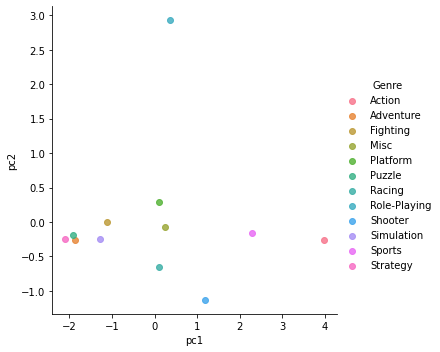

In [813]:
# 장르별 pca 결과
gen = df_sales.reset_index().iloc[:,0]
df_new = pd.concat((df_b[['pc1', 'pc2']], gen), axis=1)

plt.figure(figsize=(10,7))
ax = sns.lmplot(x='pc1', y='pc2', data=df_new, hue='Genre', fit_reg=False)

In [790]:
df_new

,pc1,pc2,Genre
0,3.97,-0.26,Action
1,-1.86,-0.26,Adventure
2,-1.12,0.00,Fighting
3,0.23,-0.07,Misc
4,0.10,0.29,Platform
5,-1.91,-0.19,Puzzle
6,0.11,-0.66,Racing
7,0.37,2.93,Role-Playing
8,1.18,-1.13,Shooter
9,-1.28,-0.25,Simulation


<Figure size 720x504 with 0 Axes>

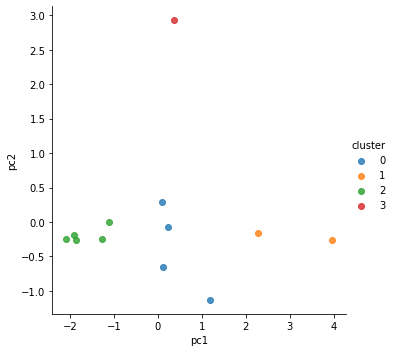

In [806]:
# pca 결과 기반 클러스터링

from sklearn.cluster import KMeans

# k값 4개로 설정
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(df_new.iloc[:,:2])
cluster_labels = kmeans.labels_

# cluster 라벨 붙임
df_new['cluster'] = cluster_labels

# cluster 기반 산포도 
plt.figure(figsize=(10,7))
ax = sns.lmplot(x='pc1', y='pc2', data=df_new, hue='cluster', fit_reg=False)